In [1]:
import pandas as pd
import numpy as np

In [7]:
hist = pd.DataFrame(np.zeros([500, 2]),columns = ["scale", "scale2"])

In [8]:
hist

,scale,scale2
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
495,0.0,0.0
496,0.0,0.0
497,0.0,0.0
498,0.0,0.0


In [9]:
hist.loc[0] = 30

In [10]:
hist

,scale,scale2
0,30.0,30.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
495,0.0,0.0
496,0.0,0.0
497,0.0,0.0
498,0.0,0.0


In [11]:
hist.loc[300] = 35
hist

,scale,scale2
0,30.0,30.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
495,0.0,0.0
496,0.0,0.0
497,0.0,0.0
498,0.0,0.0


In [14]:
len(hist[hist['scale']!=0])

2

In [17]:
np.min(hist[hist['scale']!=0]['scale'])

30.0

In [18]:
gist = np.zeros(500)
gist

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [2]:
import cv2
image = cv2.imread("/Users/hyojin/DigitalImageProcessing/HE test/Fig0316(1)(top_left).jpg", cv2.IMREAD_GRAYSCALE)

In [3]:
width, height = image.shape[0], image.shape[1]
max = np.max(image) + 1
min = np.min(image)
num_pixel = width*height

#scale histogram
hist = np.zeros(max)
#cdf of scale histogram
sum_hist = np.zeros(max)
#normalized sum
norm_hist = np.zeros(max)
result = np.zeros((width, height))
sum = 0
for i in range(width):
    for j in range(height):
        hist[image[i][j]] += 1
for i in range(max):
    sum+=hist[i]
    sum_hist[i] = sum
    norm_hist[i] = np.around((max-1)*(sum_hist[i]-min)/(num_pixel-min))
           
for i in range(width):
    for j in range(height):
        result[i][j] = norm_hist[image[i][j]]

In [58]:
np.min(image)

132

In [4]:
result.dtype

dtype('float64')

In [5]:
rr = np.array(result, dtype='uint8')

In [7]:
rr.dtype=='uint8'

True

In [23]:
image

array([[132, 132, 132, ..., 191, 191, 184],
       [132, 132, 132, ..., 190, 190, 179],
       [132, 132, 132, ..., 175, 175, 166],
       ...,
       [149, 132, 132, ..., 248, 242, 242],
       [151, 138, 132, ..., 242, 242, 235],
       [156, 145, 132, ..., 240, 240, 224]], dtype=uint8)

In [61]:
cv2.imshow("Sample", rr)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

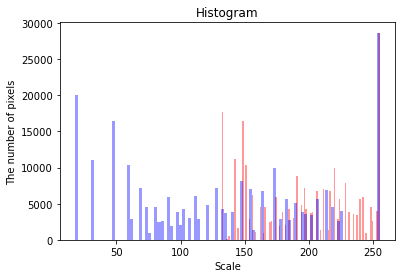

In [62]:
plt.hist(np.concatenate(image).tolist(), bins=100, alpha=0.4, color='red')
plt.hist(np.concatenate(rr).tolist(), bins=100, alpha=0.4, color='blue')
plt.title("Histogram")
plt.ylabel("The number of pixels")
plt.xlabel("Scale")
plt.show()

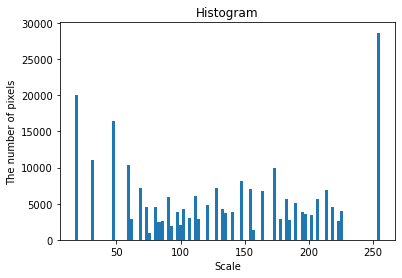

In [63]:
plt.hist(np.concatenate(rr).tolist(), bins=100)
plt.title("Histogram")
plt.ylabel("The number of pixels")
plt.xlabel("Scale")
plt.show()

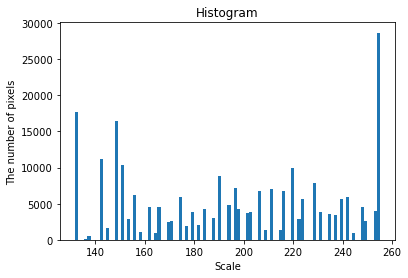

In [64]:
plt.hist(np.concatenate(image).tolist(), bins=100)
plt.title("Histogram")
plt.ylabel("The number of pixels")
plt.xlabel("Scale")
plt.show()

In [44]:
np.concatenate(image).tolist()

[132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 143,
 149,
 132,
 132,
 142,
 143,
 149,
 149,
 142,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 143,
 143,
 142,
 142,
 151,
 166,
 171,
 171,
 166,
 166,
 166,
 175,
 177,
 175,
 166,
 164,
 175,
 184,
 190,
 179,
 177,
 171,
 166,
 169,
 175,
 179,
 182,
 182,
 179,
 177,
 179,
 184,
 191,
 198,
 207,
 220,
 211,
 203,
 196,
 188,
 184,
 188,
 191,
 196,
 207,
 211,
 198,
 184,
 177,
 190,
 202,
 209,
 198,
 194,
 196,
 203,
 211,
 211,
 207,
 207,
 203,
 203,
 207,
 207,
 211,
 216,
 216,
 209,
 198,
 196,
 198,
 211,
 211,
 196,
 179,
 175,
 188,
 196,
 198,
 198,
 196,
 191,
 188,
 179,
 177,
 171,
 156,
 143,
 132,
 132

In [ ]:
result.dtype